In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import scipy.integrate as sci
import scipy as spy
import scipy.sparse as sparse
from numpy.linalg import solve
from scipy.sparse.linalg import spsolve
from scipy import interpolate
from scipy.integrate import odeint
from scipy.optimize import root


In [2]:
def f(x): return np.exp(-x**2)
def fp(x): return -2*x*np.exp(-x**2)

In [3]:
a=0.5
[(f(a+h)-f(a))/h -fp(a) for h in [1,0.1,0.01,1e-10] ]

[0.10539922456186435,
 -0.03244378693233363,
 -0.0038290740575531723,
 -6.846886991818124e-07]

In [4]:
[(f(a+h)-f(a-h))/(2*h) -fp(a) for h in [1,0.1,0.01,1e-10] ]

[0.4421000038166346,
 0.0064634685955032856,
 6.489740442361391e-05,
 -1.2957718686923414e-07]

In [24]:
def f(x,t): return -5*x
#def f(x,t): return np.cos(x*t)

def fexact(x): return np.exp(-5*x)


In [25]:
def EulerExpl(nbpas,f,duree,y0) :
    dt = duree/nbpas
    Y = np.zeros( nbpas+1 )
    Y[0] = y0 
    Temps = np.linspace(0,duree,nbpas+1)
    for n in range(nbpas) :
        Y[n+1] = Y[n] + dt*f(Y[n],Temps[n]) # schéma 
    return Temps,Y

In [26]:
duree = 1
Nbpoints = 10

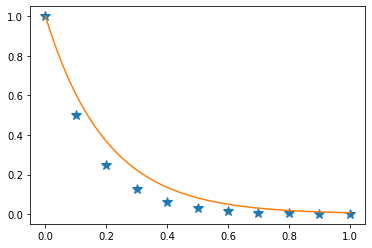

In [27]:
Temps1,Y1 = EulerExpl(Nbpoints,f,duree,1)
plt.plot(Temps1,Y1,"*",marker='*',markersize=10.,label="Euler explicite")
Vx = np.linspace(0,duree,1000)
plt.plot(Vx,fexact(Vx))

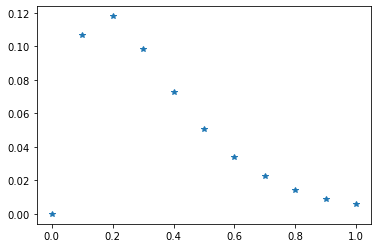

In [28]:
plt.plot(Temps1,fexact(Temps1)-Y1,"*")

In [29]:
def EulerImpl(nbpas,f,duree,y0) :
    dt = duree/nbpas
    Y = np.zeros( nbpas+1 )
    Temps = np.linspace(0,duree,nbpas+1)
    Y[0] = y0 
    for n in range(nbpas) :
        def h(V): return Y[n] + dt*f(V,Temps[n+1]) - V
        Y[n+1] = root(h,Y[n]).x
    return Temps,Y

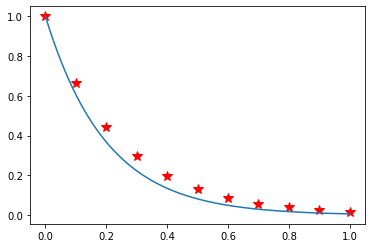

In [30]:
Temps2,Y2 = EulerImpl(Nbpoints,f,duree,1)
plt.plot(Temps2,Y2,"*r",marker='*',markersize=10.,label="Euler implicite")
Vx = np.linspace(0,duree,1000)
plt.plot(Vx,fexact(Vx))


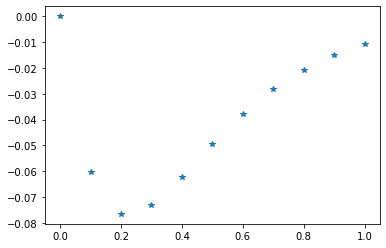

In [31]:
plt.plot(Temps2,fexact(Temps2)-Y2,"*")